# - Index
##   0. Settings
##   1. K-means++
##   2. HAC
##   3. DBSCAN
##   4. Conclusion
##   5. Source
## ---------------------------------------------------------------------------------------------------------------

# 0. Settings

### 1. Imports(3가지 모델에서 전부 사용하는 모듈 Import)

In [817]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### 2. CSV 파일을 불러와 raw 변수에 저장.

In [818]:
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'country risk 2019 data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713


### 3. raw 변수의 데이터 정보를 확인하고, 공분산을 확인한다.

In [819]:
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


### 4. 각 변수의 분포 확인

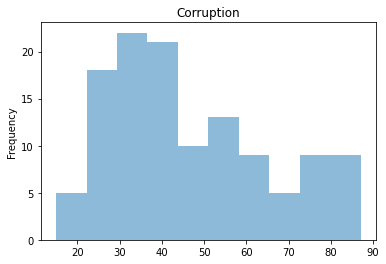

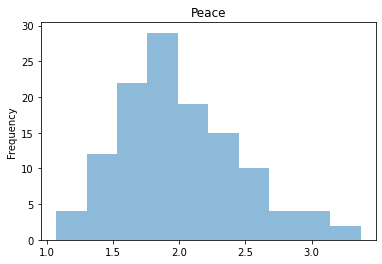

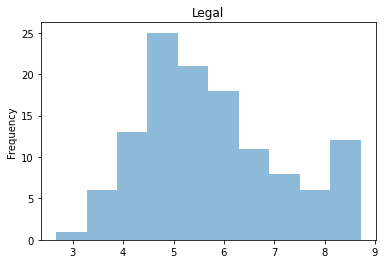

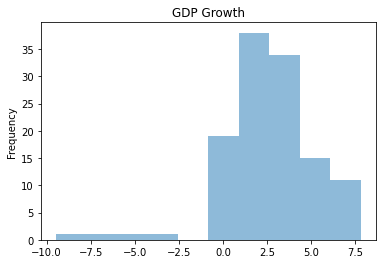

In [820]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

### 5. 정규화
    변수 간의 Correlation을 확인해본 결과 두 독립변수(Corruption과 Legal) 사이에 다중공전성이 발생하였다. 이에 Corruption을 제외한 나머지 변수들을 정규화하여 분석을 진행한다.
    - 정규화를 하지 않은 경우 : K = 3 일 때, inertia가 376.99
    - 정규화를 한 경우        : K = 3 일 때, inertia가 161.1
        ⇒ inertia가 작을수록 우수한 모델이므로 정규화는 필요하다.

In [821]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()

# 1. K-Means++
    X : Seeds를 뽑을 Data
    n_clusters : 처음 시작할 centroids 수
    x_squared_norms : 각 data 포인트의 squared L2 norm (Default = None)

### 1-1. WSS-vs-k에서 최적의 K를 3으로 추정. (Elbow  Method)
    random_state는 초기값으로 인해 결과가 바뀌는 K-means의 단점을 보완하는 역할을 한다. 
    즉, 내가 random_state = some_number에서 some_number에 어떠한 수이던 넣을 수 있지만, 
    내가 전에 42를 넣었고 현재 42를 넣는다면 같은 결과가 도출됨.

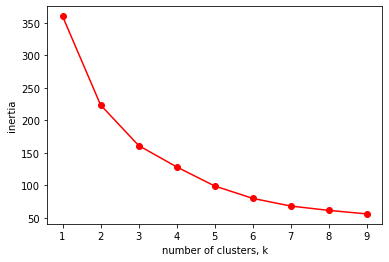

In [822]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

model = KMeans(n_clusters = 3, init='k-means++')

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(X)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-ro')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### 1-2. K = 3일 때 inertia를 구하고, 클러스터 중심과 레이블을 확인한다.

In [823]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=100)
kmeans.fit(X)

print(f"inertia(when k = {k}) :", kmeans.inertia_) #Inertia는 K-means에 의해 얼마나 데이터 셋이 군집화되었는 지를 보여준다. 

print("")

print("클러스터 중심 : ", sep='\n')
print(kmeans.cluster_centers_)

print("")

y = kmeans.labels_
print("클러스터 레이블 확인 : \n", y)

inertia(when k = 3) : 161.3674843528487

클러스터 중심 : 
[[ 0.15312373 -0.59502882  0.75081549]
 [-0.85097477  1.02149992 -0.23897931]
 [ 1.14100086 -0.67938007 -0.86768857]]

클러스터 레이블 확인 : 
 [0 0 2 0 1 1 2 2 0 1 0 0 0 1 2 0 2 0 1 2 1 0 2 1 0 1 1 2 1 0 2 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 2 1 1 1 1 0 0 1 1 1 2 2 1 0 0 1 0 0 1 2 0 0 0 2
 0 1 1 2 2 1 1 2 0 2 0 0 1 1 1 1 2 0 2 0 0 0 1 1 1 2 1 0 1 1 1 0 0 0 2 2 2
 0 2 1 1 1 1 0 2 0 2]


### Predict 메서드를 사용해 새로운 데이터의 클러스터 레이블을 예측할 수 있다. 
### 예측은 각 포인트에 가장 가까운 클러스터 중심을 할당하는 것이며 기존 모델은 변경되지 않는다.

In [824]:
print(np.array_equal(kmeans.labels_,kmeans.predict(X)))

True


### 1-3. projection = '3d'를 통해 3차원 공간에서 군집화된 형태를 표현한다.

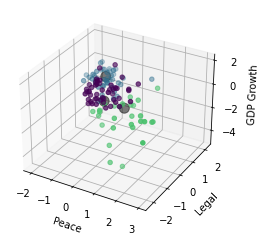

In [825]:
import matplotlib.colors as clrs # Matplotlib 색 입히기

norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### 1-4. Scatter를 이용해 2차원에서 군집화된 형태를 표현한다.

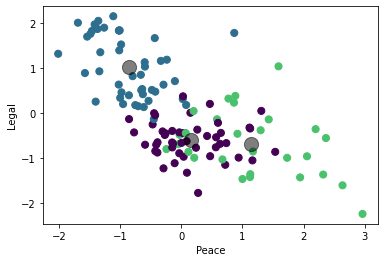

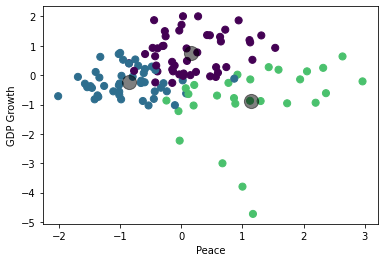

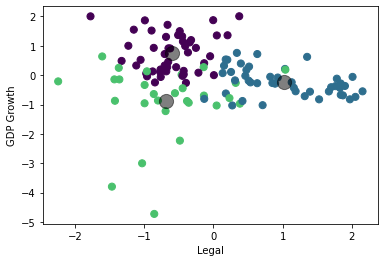

In [826]:
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### 1-5. Scatter를 이용하되 점이 아닌 국가 코드를 2차원에 군집화된 형태를 표현한다.

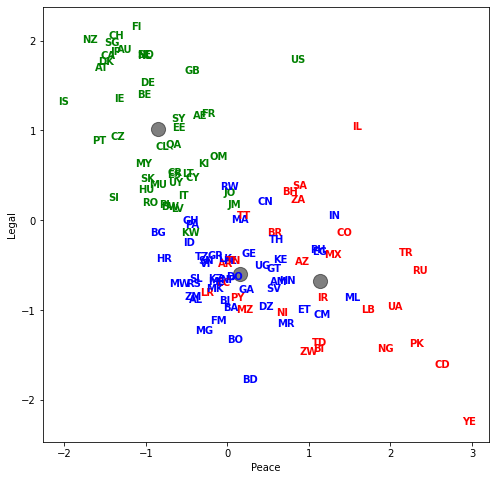

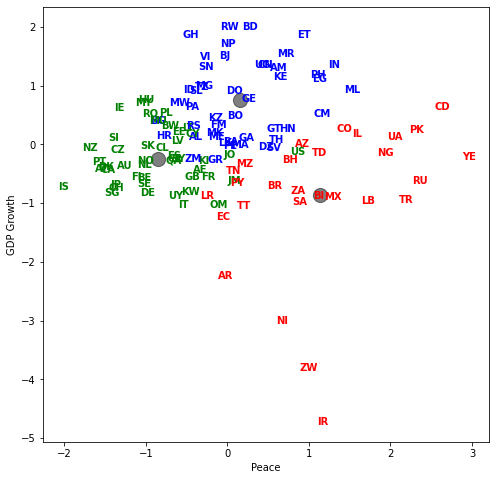

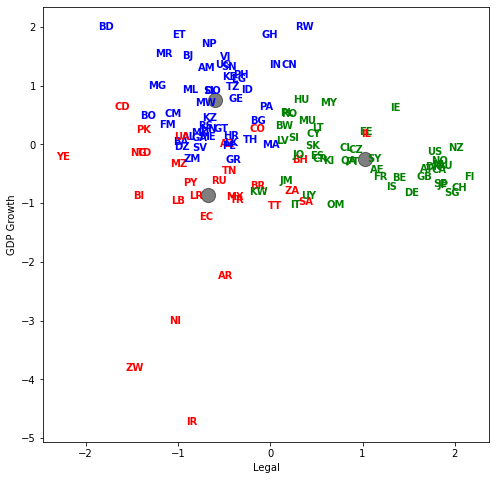

In [827]:
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()


###  1-6. 군집화된 결과를 result에 저장한다.

In [828]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
119                        Zambia     ZM      0
31                          Egypt     EG      0
32                    El Salvador     SV      0
34                       Ethiopia     ET      0
37                          Gabon     GA      0
38                        Georgia     GE      0
40                          Ghana     GH      0
41                         Greece     GR      0
42                      Guatemala     GT      0
43                       Honduras     HN      0
74                          Nepal     NP      0
29             Dominican Republic     DO      0
105                      Tanzania     TZ      0
47                      Indonesia     ID      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
106                      Thailand     TH      0
67                     Mauritania     MR

### 1-7. 실루엣 점수를 통해 군집화가 얼마나 잘 되었는지 판단한다.

In [829]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("k-clusters -"  , n_clusters,
          "silhouette_score is :", silhouette_avg)

k-clusters - 2 silhouette_score is : 0.35091395238521605
k-clusters - 3 silhouette_score is : 0.35585223343505057
k-clusters - 4 silhouette_score is : 0.3372449209416129
k-clusters - 5 silhouette_score is : 0.34438420977393375
k-clusters - 6 silhouette_score is : 0.34875382122984605
k-clusters - 7 silhouette_score is : 0.3603542108728006
k-clusters - 8 silhouette_score is : 0.3394917368960437
k-clusters - 9 silhouette_score is : 0.3152647236003266
k-clusters - 10 silhouette_score is : 0.3090796538425007


# 2. HAC: Hierarchical Agglomerative Clustering

## 2-1. sklearn.cluster를 이용한 Hierarchical Clustering

### 2-1-1. Imports

In [830]:
from sklearn.cluster import AgglomerativeClustering # HAC clustering
import scipy.cluster.hierarchy as sch

### 2-1-2. 정규화
    앞선 K-means++에서 사용된 X가 변화되는 것을 방지하기 위해 X를 초기화하고 정규화한다.
    앞선 K-means++와 변수를 구분하기 위해 hac_x를 사용한다.

In [831]:
hac_x = raw[['Peace', 'Legal', 'GDP Growth']]
hac_x = (hac_x - hac_x.mean()) / hac_x.std()

### 2-1-3 scipy.cluser.hierarchy.linkage(y, method, metric, optiaml_ordering)
    y = 사용할 데이터(type = ndarray)
    method = 사용할 연결법(ward, average 등, type = str)

In [832]:
def HAC(hac_x, method, K): # method에는 군집 간의 거리를 측정하기 위한 거리 측정 방법이 들어감.

    hierarchy = sch.linkage(hac_x, method = method, optimal_ordering = True) # Sch 함수를 통해 덴드로그램 생성.

    sch.set_link_color_palette(['#d81159', '#ffbc42', '#00c49a', '#0496ff'])     # 색은 4개가 반복되도록 함.
    sch.dendrogram(hierarchy, leaf_rotation=90, leaf_font_size=6, labels=list(raw['Abbrev']), 
                   color_threshold= K, above_threshold_color='black')

    # Add horizontal line
    plt.axhline(y=K, c='grey', lw=1, linestyle='dashed') # 시각적으로 K의 위치를 파악하기 위해 회색선으로 K 위치 표시.

    plt.figure(figsize = (20,9), dpi = 100)
    plt.show()

### 2-1-4. 각 연결법에 따라 달라지는 군집화를 확인한다.
    HAC 함수에는 3가지 변수가 들어간다.
        1. hac_x : 사용하고자 했던 데이터
        2. method : 사용할 연결법
        3. K : 군집화를 가장 잘 보여줄 수 있는 K 조절

#### 평균연결법(Average Linkage)

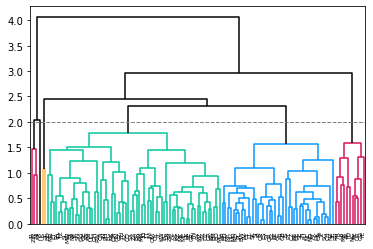

<Figure size 2000x900 with 0 Axes>

In [833]:
HAC(hac_x, 'average', 2) # 위 함수에 method를 평균 연결법으로 수행, K일 것 같은 값 임의로 설정

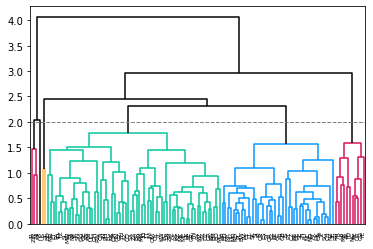

<Figure size 2000x900 with 0 Axes>

In [834]:
HAC(hac_x, 'average', 2) # 위 함수에 method를 평균 연결법으로 수행, K일 것 같은 값 임의로 설정

#### 단일연결법(Single Linkage)
    최단연결법. 생성된 군집과 기존의 데이터들의 거리를 가장 가까운 데이터로 계산.

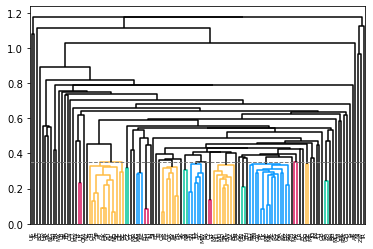

<Figure size 2000x900 with 0 Axes>

In [835]:
HAC(hac_x, 'single', 0.35) # 사실상 제대로 군집을 만들지 못한다고 판단됨.

#### 완전연결법(Complete Linkage)
    최장연결법. 데이터들의 거리를 가장 먼 데이터로 계산. 내부 응집성에 중점을 둔 방법.

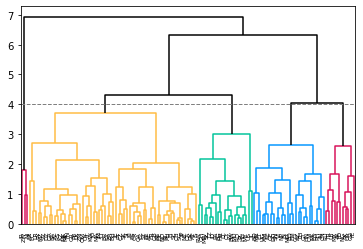

<Figure size 2000x900 with 0 Axes>

In [836]:
HAC(hac_x, 'complete', 4)

#### 중심연결법(Centroid Linkage)
    각 군집의 중심점 사이의 거리를 거리로 정의한 방법.

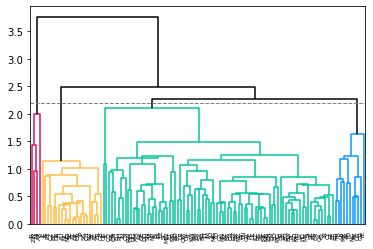

<Figure size 2000x900 with 0 Axes>

In [837]:
HAC(hac_x, 'centroid',2.2)

#### 와드연결법(Ward Linkage)

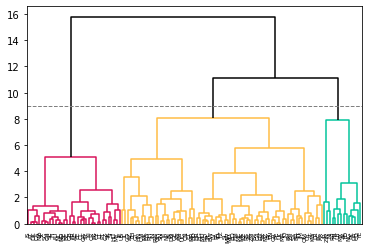

<Figure size 2000x900 with 0 Axes>

In [838]:
HAC(hac_x, 'ward',9)

## 2-2. sklearn.cluster를 이용한 Agglomerative Clustering
### 2-2-1. AgglomerativeClustering 변수 설명
#### - affinity  : euclidean, l1, l2, manhattan, cosine, precomputed(단, linkage가 ward일 경우 euclidean만 허용됨)
#### - linkage : ward, complete, average, single (default = ward)

In [839]:
from sklearn.cluster import AgglomerativeClustering

ag_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ag_cluster.fit(hac_x)

hac_y = ag_cluster.labels_
print(hac_y)

[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 2 0 1 2 1 0 0 1 0 1 1 2 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 0 0 0 1 0 0 0 1 0 0 2 0 1 0 0 1 0 0 0 2 0 0 0 0
 0 1 1 2 2 1 0 2 0 0 0 0 0 1 1 0 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 2
 0 2 1 1 0 0 0 2 0 2]


### 2-2-2. Scatter를 이용하여 2차원에 군집화된 형태를 표현한다.

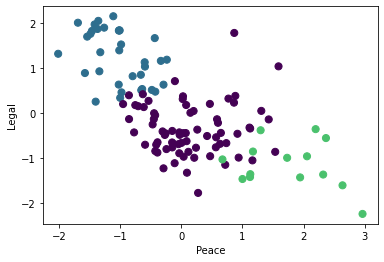

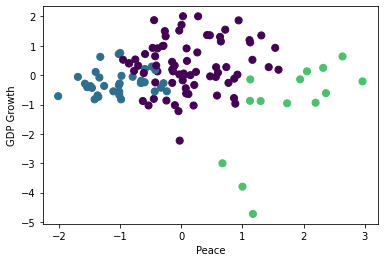

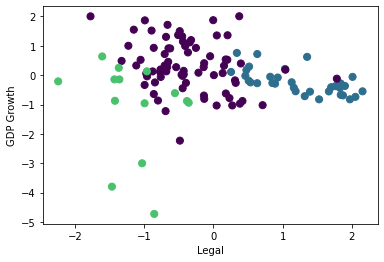

In [840]:
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(hac_x.iloc[:,figs[i][0]], hac_x.iloc[:,figs[i][1]], c=cmap(norm(hac_y)), s=50)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### 2-2-3. Scatter를 이용하되 점이 아닌 국가 코드를 2차원에 군집화된 형태를 표현한다.

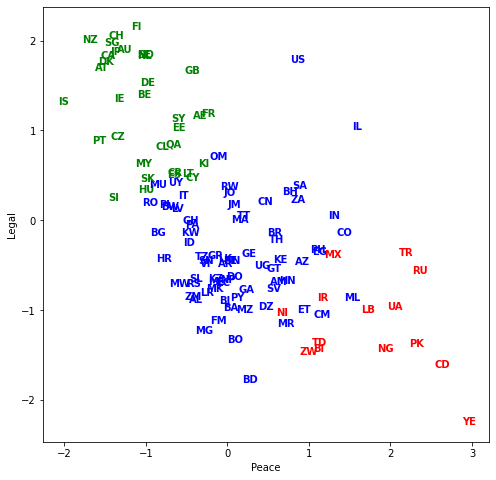

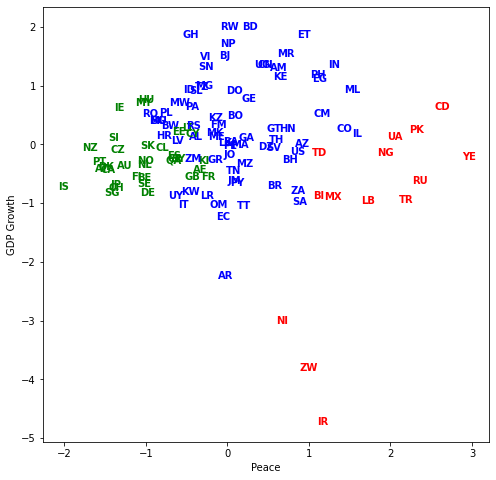

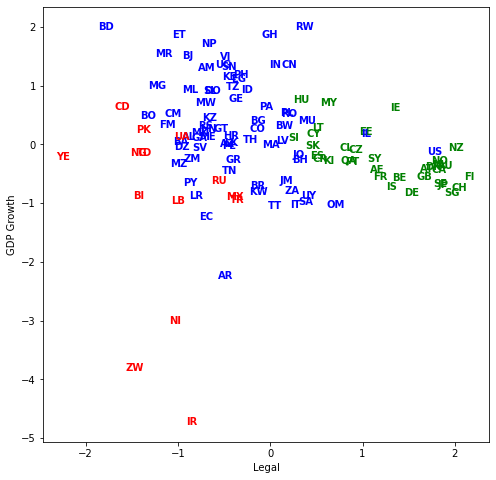

In [841]:
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(hac_x.iloc[:, x_1], hac_x.iloc[:, x_2], c=hac_y, s=0, alpha=0)
    for j in range(hac_x.shape[0]):
        plt.text(hac_x.iloc[j, x_1], hac_x.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[hac_y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### 2-2-4. projection = '3d'를 통해 3차원 공간에서 군집화된 형태를 표현한다.

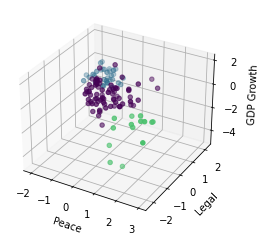

In [842]:
norm = clrs.Normalize(vmin=0.,vmax=hac_y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(hac_x.iloc[:,0], hac_x.iloc[:,1], hac_x.iloc[:,2], c=cmap(norm(hac_y)), marker='o')

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### 2-3. 군집화된 결과를 result에 저장한다.

In [843]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':hac_y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
70                        Moldova     FM      0
68                      Mauritius     MU      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
119                        Zambia     ZM      0
71                     Montenegro     ME      0
59                         Latvia     LV      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
108           Trinidad and Tobago     TT      0
52                        Jamaica     JM      0
51                          Italy     IT      0
50                         Israel     IL      0
115                 United States     US      0
47                      Indonesia     ID      0
58                         Kuwait     KW

### 2-4. 실루엣 점수를 통해 군집화가 얼마나 잘 되었는지 판단한다.

In [844]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels=clusterer.fit_predict(hac_x)
    silhouette_avg=silhouette_score(hac_x,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.3280667394105972
For n_clusters= 3 The average silhouette_score is : 0.3397952779144782
For n_clusters= 4 The average silhouette_score is : 0.2834928998119738
For n_clusters= 5 The average silhouette_score is : 0.30918895946481106
For n_clusters= 6 The average silhouette_score is : 0.2952627956701328
For n_clusters= 7 The average silhouette_score is : 0.2836353293519231
For n_clusters= 8 The average silhouette_score is : 0.2884893343748716
For n_clusters= 9 The average silhouette_score is : 0.2827874619365218
For n_clusters= 10 The average silhouette_score is : 0.2886535188401221


# 3. DBSCAN
    개념 : 높은 밀도로 모여 있는 Observation들을 중심으로 군집을 형성
    ▶ 모수(Parameter)
        ● ϵ : 데이터로부터의 반경(= ϵ - neighberhood of x)
        ● minPts : 군집을 구성하는데 필요한 최소의 데이터 수
    ▶ 분류 점(Point)
        ● core point : 한 점의 ϵ-반경 내에 minPts 보다 많은 개체가 포함된 점.
        ● border point : 적어도 하나의 코어점의 반경에 속하는 점.
        ● noise point : core point가 아닌 점으로, ϵ-반경 내에 minPts보다 적은 수의 개체를 포함하는 점.

### 3-1. Imports

In [845]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

### 3-2. X를 초기화 및 정규화하고, DBSCAN을 통해 scan_x를 훈련시킴

In [846]:
from sklearn import metrics

scan_x = raw[['Peace', 'Legal', 'GDP Growth']]
scan_x = (scan_x - scan_x.mean()) / scan_x.std()
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan.fit(scan_x)
scan_y = dbscan.labels_

n_clusters_ = len(set(scan_y)) - (1 if -1 in labels else 0)
n_noise_ = list(scan_y).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("cluster labels: ", scan_y)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(scan_x, scan_y))

Estimated number of clusters: 5
Estimated number of noise points: 48
cluster labels:  [ 0  0 -1  3  1  1  0 -1 -1  1 -1  0  0  2 -1  2 -1 -1  1 -1  2 -1 -1  2
  0  2 -1 -1  1  2 -1  3  0  2 -1  1  2  0 -1  1 -1  0  0  0  2 -1 -1  2
 -1 -1 -1 -1 -1  1  2  0  3  2 -1  2 -1 -1  2 -1  0  2 -1 -1  2 -1  0  0
  0  0 -1  1  1 -1 -1  1 -1 -1  2  0  0  3  2 -1  2  2 -1 -1 -1  2  0  2
  1  2  2 -1  2  0  1  1  2  2  0  0 -1  0 -1  3 -1  2 -1 -1 -1  2 -1  0
 -1]
Silhouette Coefficient: 0.089


### 3-3. 2차원 평면에 범주화된 자료를 표시한다.

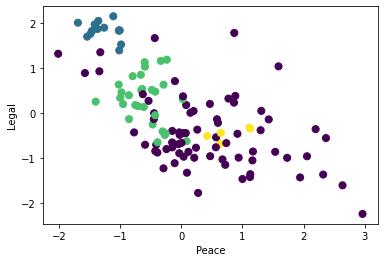

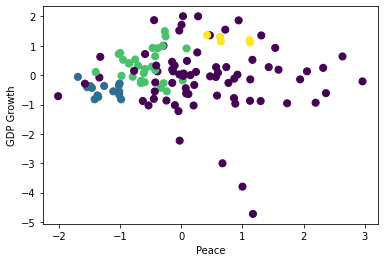

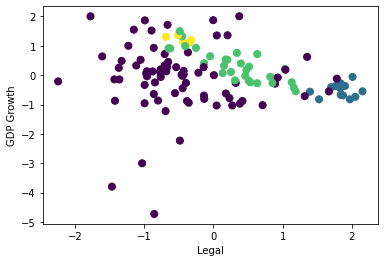

In [847]:
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(scan_x.iloc[:,figs[i][0]], scan_x.iloc[:,figs[i][1]], c=cmap(norm(scan_y)), s=50)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### 3-4. 2차원 평면 각 변수를 문자로 표현하여 범주화된 자료를 표시한다.

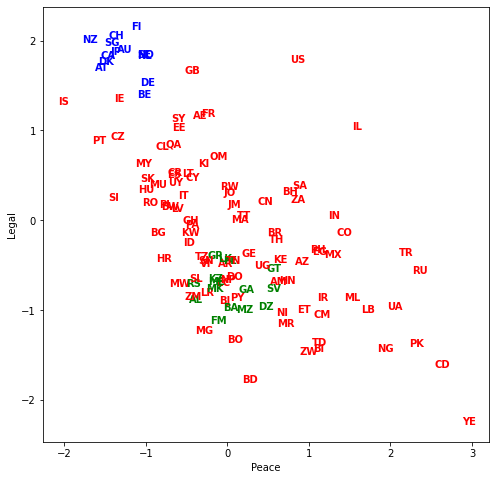

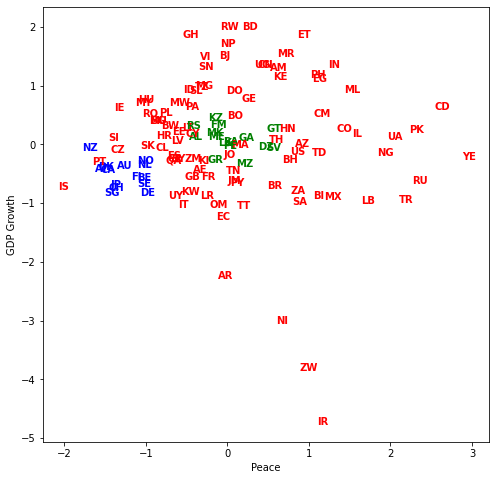

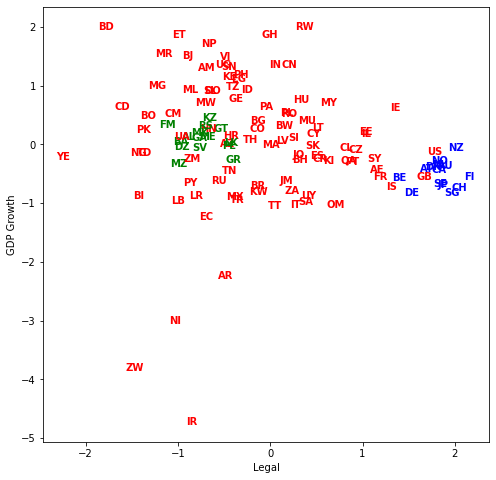

In [896]:
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(scan_x.iloc[:, x_1], scan_x.iloc[:, x_2], c=scan_y, s=0, alpha=0)
    for j in range(hac_x.shape[0]):
        plt.text(scan_x.iloc[j, x_1], scan_x.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[scan_y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### 3-5. 3차원 공간에 범주화된 자료를 표시한다.

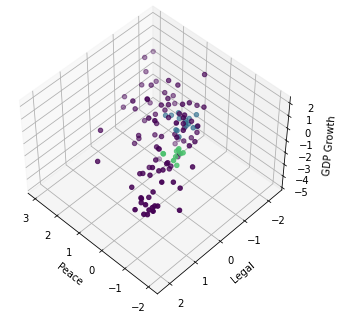

In [897]:
norm = clrs.Normalize(vmin=0.,vmax=scan_y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(scan_x.iloc[:,0], scan_x.iloc[:,1], scan_x.iloc[:,2], c=cmap(norm(scan_y)), marker='o')

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### 3-6. 결과를 Result라는 DataFrame에 저장한다.

In [898]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':scan_y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
60                        Lebanon     LB     -1
83                       Paraguay     PY     -1
82                         Panama     PA     -1
81                       Pakistan     PK     -1
80                           Oman     OM     -1
78                        Nigeria     NG     -1
77                      Nicaragua     NI     -1
74                          Nepal     NP     -1
72                        Morocco     MA     -1
69                         Mexico     MX     -1
67                     Mauritania     MR     -1
66                           Mali     ML     -1
64                         Malawi     MW     -1
63                     Madagascar     MG     -1
61                        Liberia     LR     -1
119                        Zambia     ZM     -1
58                         Kuwait     KW     -1
57                  Korea (South)     KI     -1
56                          Kenya     KE     -1
54                         Jordan     JO

### 3-7. eps = 0.5로 가정하고 minpts에 따라 실루엣 계수를 계산한다.

In [899]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
print("eps = 0.5라고 가정할 때,")
for n_clusters in range_n_clusters:
    dbscan = DBSCAN(eps = 0.5, min_samples = n_clusters)
    dbscan.fit(scan_x)
    scan_y = dbscan.labels_

    n_clusters_ = len(set(scan_y)) - (1 if -1 in labels else 0)
    
    print("Estimated number of clusters: %d" % n_clusters, end = ' ')
    print("-> Silhouette Coefficient: %0.3f" % metrics.silhouette_score(scan_x, scan_y))

eps = 0.5라고 가정할 때,
Estimated number of clusters: 2 -> Silhouette Coefficient: -0.021
Estimated number of clusters: 3 -> Silhouette Coefficient: -0.003
Estimated number of clusters: 4 -> Silhouette Coefficient: 0.095
Estimated number of clusters: 5 -> Silhouette Coefficient: 0.089
Estimated number of clusters: 6 -> Silhouette Coefficient: 0.058
Estimated number of clusters: 7 -> Silhouette Coefficient: 0.087
Estimated number of clusters: 8 -> Silhouette Coefficient: 0.038
Estimated number of clusters: 9 -> Silhouette Coefficient: -0.001
Estimated number of clusters: 10 -> Silhouette Coefficient: -0.034


# 4. Conclusion
## K-Means++, HAC, DBSCAN 비교
    (단, HAC는 WARD을 기준으로 한다.)

### 4.1 2차원 평면에서의 비교

K-means++


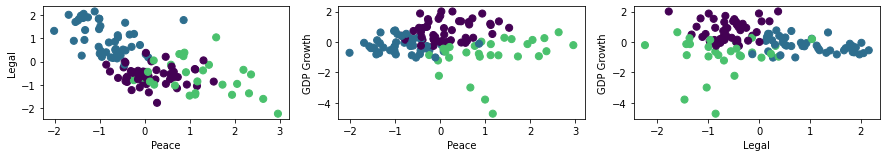

HAC


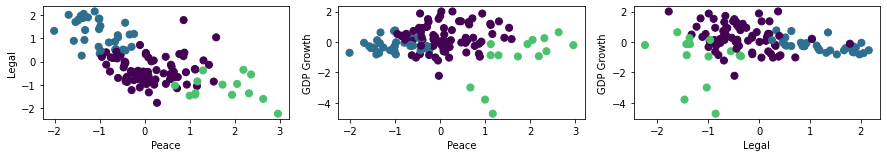

DBSCAN


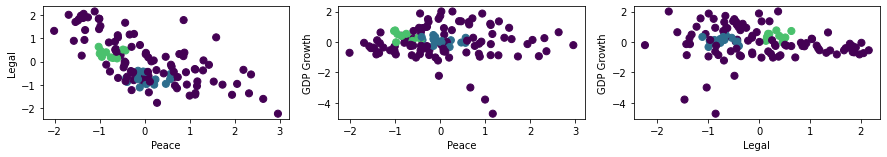

In [892]:
def two_dimensions(X, y, pos):
    li = ["K-means++", "HAC", "DBSCAN"]
    labels = ['Peace', 'Legal', 'GDP Growth']
    
    figs = [(0, 1), (0, 2), (1, 2)]
    
    plt.figure(figsize=(15,12))
    
    print(li[pos])
    
    for i in range(3):
        plt.subplot2grid(shape = (5,3), loc = (pos, i), colspan = 1)
        plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)

        plt.xlabel(labels[figs[i][0]])
        plt.ylabel(labels[figs[i][1]])
        
    plt.show()
    
two_dimensions(X,y, 0)
two_dimensions(hac_x,hac_y, 1)
two_dimensions(scan_x, scan_y, 2)

### 4.2 2차원 평면에서 국가 코드로 비교

K-means++


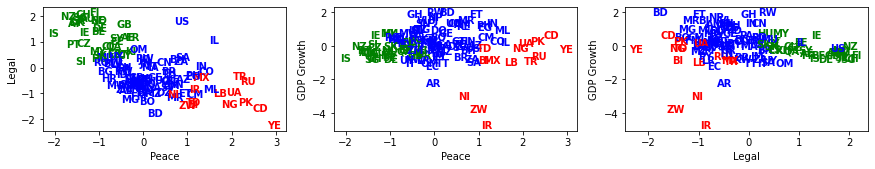

HAC


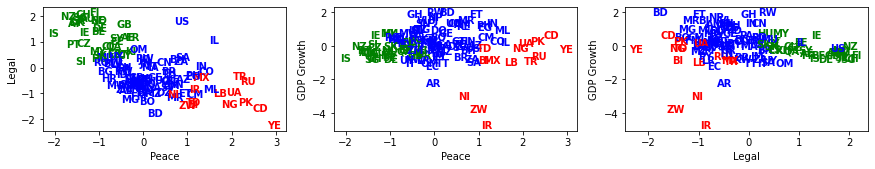

DBSCAN


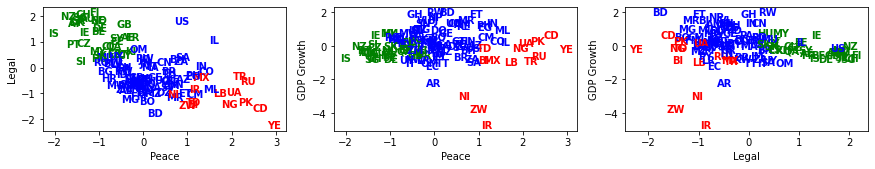

In [903]:
def two_text_dimension(X,y,pos):
    figs = [(0, 1), (0, 2), (1, 2)]
    li = ["K-means++", "HAC", "DBSCAN"]
    print(li[pos])
    labels = ['Peace', 'Legal', 'GDP Growth']
    colors = ['blue','green', 'red']
    
    plt.figure(figsize=(20,16))

    for i in range(3):
        plt.subplot2grid(shape = (6,4), loc = (pos, i), colspan = 1)
        x_1 = figs[i][0]
        x_2 = figs[i][1]
        plt.scatter(hac_x.iloc[:, x_1], hac_x.iloc[:, x_2], c=hac_y, s=0, alpha=0)
        for j in range(hac_x.shape[0]):
            plt.text(hac_x.iloc[j, x_1], hac_x.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                     color=colors[hac_y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
        plt.xlabel(labels[x_1])
        plt.ylabel(labels[x_2])

    plt.show()
    
two_text_dimension(X,y, 0)
two_text_dimension(hac_x,hac_y, 1)
two_text_dimension(scan_x, scan_y, 2)   

### 4.3 3차원 평면에서의 비교

K-means++


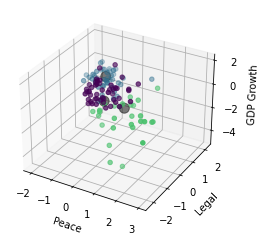

HAC


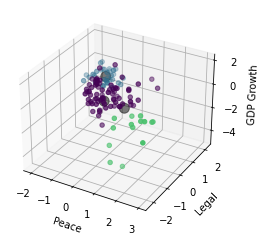

DBSCAN


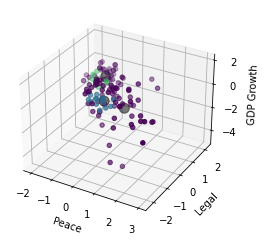

In [893]:
def three_dimension(X,y, pos):
    li = ["K-means++", "HAC", "DBSCAN"]
    print(li[pos])
    norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
    cmap = cm.viridis

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

    ax.set_xlabel('Peace')
    ax.set_ylabel('Legal')
    ax.set_zlabel('GDP Growth')

    plt.show()
    
three_dimension(X,y, 0)
three_dimension(hac_x,hac_y, 1)
three_dimension(scan_x, scan_y, 2)

# 5. 참고문헌(url 포함)
### Sklearn
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
### K-Means Clustering(K 평균 군집화) 개념 정리
    https://eunsukimme.github.io/ml/2019/12/16/K-Means/
### Comparing different clustering algorithms on toy datasets
    https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
### [Data Analysis 개념] Clustering(1) - K-means/K-medoids
    https://todayisbetterthanyesterday.tistory.com/58
### Demo of DBSCAN clustering algorithm
    https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
### 2021 ADsP 데이터 분석 준전문가(도서)
### Plot Hierarchical Clustering Dendrogram
    https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html?highlight=dendro
### DBSCAN (밀도 기반 클러스터링)
    https://bcho.tistory.com/1205 [조대협의 블로그]
### 그래프 정령
    https://chunggaeguri.tistory.com/entry/Matplotlib-%EA%B7%B8%EB%9E%98%ED%94%84-%EC%A0%95%EB%A0%AC-%EC%98%88%EC%A0%9C-%EB%B0%8F-%EC%BD%94%EB%93%9C